# Feature Import

In [38]:
# Manipulação de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pré-processamento dos Dados
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modelos Utilizados
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Otimização
from sklearn.model_selection import train_test_split, GridSearchCV

# Métricas de Avaliação: Classificação
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay

In [2]:
dfs = pd.read_excel("../data/dados.xlsx", sheet_name = None, index_col = "Empresa")
print("DataFrames disponíveis: ", list(dfs.keys())) # representam indicadores de anos antes da falência

n = int(input("\nSelecione dados de 1 a 5 anos pré-falência: "))

DataFrames disponíveis:  ['df_1y', 'df_2y', 'df_3y', 'df_4y', 'df_5y']

Selecione dados de 1 a 5 anos pré-falência: 1


In [3]:
df = dfs[list(dfs.keys())[0]]
df.head()

,Dispon/PC,Dispon/Receita Liq Operacional,Dispon/AC,Dispon/AT,AC/PC,AC/AT,PC/AT,PC/Receita Liq Operacional,Estoque/AT,Quick assets/AT,...,VA/IMOBILIZADO,VA/AT,VA/RLO,Contas a pagar/RLO,AC/RLO,Estoque/RLO,NOWC/RLO,Contas a receber/RLO,RLO/AT,Alvo
Empresa,,,,,,,,,,,,,,,,,,,,,
BOMBRIL,0.037400,0.022244,0.101842,0.029547,0.367232,0.290121,0.790021,0.594763,0.031404,0.258718,...,1.912136,0.573094,0.431451,0.095822,0.218416,0.023642,-0.112902,0.130422,1.328294,1
COSAN,1.644152,0.042668,0.535983,0.063081,3.067545,0.117692,0.038367,0.025951,0.012073,0.105619,...,-94.153913,-0.273755,-0.185168,0.004062,0.079607,0.008166,0.0563916,0.009919,1.478415,0
METALFRIO,0.714739,0.581478,0.562656,0.390647,1.270295,0.694291,0.546559,0.813553,0.154425,0.539866,...,-0.557492,-0.091249,-0.135825,0.192842,1.033452,0.229861,0.795228,0.176731,0.671817,0
TAESA,0.621887,0.963256,0.842059,0.172986,0.738532,0.205432,0.278163,1.548924,NaN,0.205432,...,64.438054,0.164443,0.915685,0.014210,1.143930,NaN,1.12769,0.178644,0.179584,0
TUPY,1.260625,0.444879,0.556159,0.265093,2.266661,0.476648,0.210287,0.352903,0.067499,0.409149,...,-0.199108,-0.066526,-0.111644,0.086110,0.799912,0.113277,0.613744,0.158185,0.595876,0


# Feature Engineering

In [4]:
df.dropna(inplace = True)

In [5]:
X = df.drop("Alvo", axis = 1)
y = df["Alvo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### Padronização

In [14]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

#### Análise de Componentes Principais (PCA)

In [76]:
pca = PCA()
X_train = pca.fit_transform(X_train_norm)
X_test = pca.transform(X_test_norm)

In [77]:
pca.explained_variance_ratio_.cumsum().round(2)

array([0.24, 0.4 , 0.52, 0.61, 0.68, 0.74, 0.79, 0.83, 0.86, 0.88, 0.91,
       0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  ])

# Modelling

### Logistic Regression

In [94]:
modelo = LogisticRegression(max_iter = 1000, random_state = 42)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<AxesSubplot:title={'center':'Probabilidades'}>

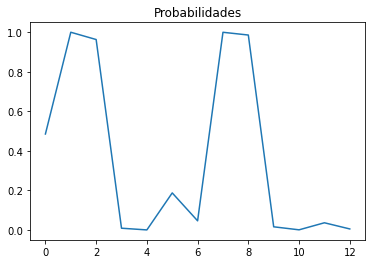

In [95]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba_train = modelo.predict_proba(X_train)[:,1]
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [96]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[23  0]
 [ 0 14]]

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        14

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [100]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[7 1]
 [2 3]]

0.7692307692307693

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.75      0.60      0.67         5

    accuracy                           0.77        13
   macro avg       0.76      0.74      0.75        13
weighted avg       0.77      0.77      0.76        13



AUC - Teste : 0.575


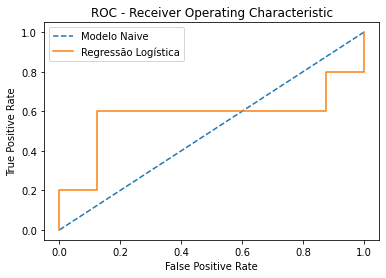

In [101]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Regressão Logística')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Random Forest

Hiperparâmetros a serem otimizados:

* n_estimators -> número de árvores distintas estimadas (padrão: 10 -> pode ser muito pequeno)
* max_features -> número máximo de variáveis independentes a ser considerado em cada nó das árvores de decisão (padrão: raiz quadrada da quantidade de variáveis independentes imputada ao modelo, o que é uma boa medida)

In [120]:
# Cross-validation
modelo = RandomForestClassifier(random_state = 42)

parametros = {'max_depth': [10, 20, 30, None],
              'min_samples_leaf': [1, 3, 5, 7],
              'min_samples_split': [2, 6, 10, 14],
              'n_estimators': [25, 50, 100, 200, 500, 1000],
              'criterion': ["gini", 'entropy']}

melhor_modelo = GridSearchCV(modelo, parametros, n_jobs = -1, cv = 2, scoring = "roc_auc")
melhor_modelo.fit(X_train, y_train)

print('Melhor conjunto de parâmetros:\n', melhor_modelo.best_params_)

Melhor conjunto de parâmetros:
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [121]:
modelo = RandomForestClassifier(random_state = 42, verbose = True, criterion = "gini", max_depth = 10, min_samples_leaf = 7, min_samples_split = 2, n_estimators = 100)
modelo.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(max_depth=10, min_samples_leaf=7, random_state=42,
                       verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


<AxesSubplot:title={'center':'Probabilidades'}>

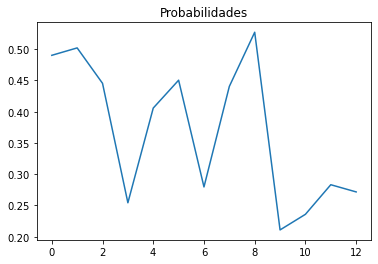

In [122]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [123]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[23  0]
 [ 2 12]]

0.9459459459459459

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.86      0.92        14

    accuracy                           0.95        37
   macro avg       0.96      0.93      0.94        37
weighted avg       0.95      0.95      0.94        37



In [124]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[8 0]
 [3 2]]

0.7692307692307693

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.40      0.57         5

    accuracy                           0.77        13
   macro avg       0.86      0.70      0.71        13
weighted avg       0.83      0.77      0.74        13



AUC - Teste : 0.75


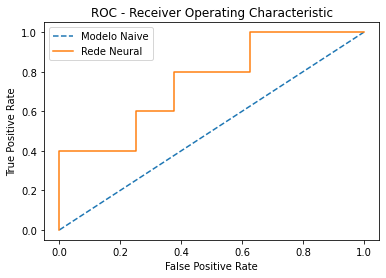

In [125]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Rede Neural')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Neural Network

Hiperparâmetros a serem otimizados:

* hidden_layer_sizes -> tupla contendo o número de neurônios dentro de cada camada (padrão: uma camada de 100 neurons)
* max_iter -> número máximo de iterações a serem realizadas pelo método de backpropagation
* alpha -> o valor máximo de alteração dos coeficientes em cada iteração, para minimizar a função de custo (padrão: 0.0001)
* solver -> Algoritmo utilizado para encontrar a solução ótima, cujo tempo de obtenção da resposta varia. Opções: 'lbfgs', 'sgd' e 'adam'.

In [39]:
# Cross-validation
#modelo = MLPClassifier(max_iter = 100)

#parametros = {'hidden_layer_sizes': [(50,50), (50,100,50), (100,)],
#               'activation': ['tanh', 'relu'],
#               'solver': ['sgd', 'adam', "lbfgs"],
#               'alpha': [0.0001, 0.05],
#               'learning_rate': ['constant','adaptive'],
#               'max_iter': [5, 15, 25, 50, 100]}

# melhor_modelo = GridSearchCV(modelo, parametros, n_jobs = -1, cv = 2, scoring = "roc_auc")
# melhor_modelo.fit(X_train, y_train)

# print('Melhor conjunto de parâmetros:\n', melhor_modelo.best_params_)

Melhor conjunto de parâmetros:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


In [57]:
# Para não ter que rodar novamente...
modelo = MLPClassifier(activation = "tanh", alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = "constant", max_iter = 100, solver = "adam", verbose = True, random_state = 42)
modelo.fit(X_train, y_train)

Iteration 1, loss = 0.57486975
Iteration 2, loss = 0.50491609
Iteration 3, loss = 0.44511733
Iteration 4, loss = 0.39392104
Iteration 5, loss = 0.34988849
Iteration 6, loss = 0.31182551
Iteration 7, loss = 0.27878196
Iteration 8, loss = 0.24999564
Iteration 9, loss = 0.22484269
Iteration 10, loss = 0.20280460
Iteration 11, loss = 0.18344795
Iteration 12, loss = 0.16641083
Iteration 13, loss = 0.15139066
Iteration 14, loss = 0.13813081
Iteration 15, loss = 0.12640722
Iteration 16, loss = 0.11601725
Iteration 17, loss = 0.10677321
Iteration 18, loss = 0.09850130
Iteration 19, loss = 0.09104446
Iteration 20, loss = 0.08426673
Iteration 21, loss = 0.07805645
Iteration 22, loss = 0.07232746
Iteration 23, loss = 0.06701761
Iteration 24, loss = 0.06208494
Iteration 25, loss = 0.05750231
Iteration 26, loss = 0.05325153
Iteration 27, loss = 0.04931799
Iteration 28, loss = 0.04568682
Iteration 29, loss = 0.04234097
Iteration 30, loss = 0.03926104
Iteration 31, loss = 0.03642630
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=100,
              random_state=42, verbose=True)

<AxesSubplot:title={'center':'Probabilidades'}>

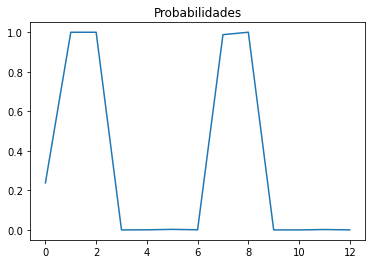

In [58]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [59]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[23  0]
 [ 0 14]]

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        14

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [60]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[7 1]
 [2 3]]

0.7692307692307693

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.75      0.60      0.67         5

    accuracy                           0.77        13
   macro avg       0.76      0.74      0.75        13
weighted avg       0.77      0.77      0.76        13



AUC - Teste : 0.75


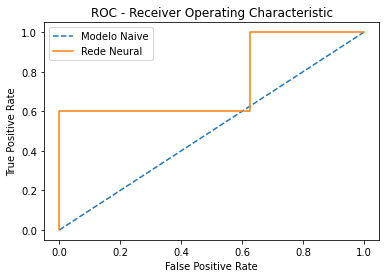

In [61]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Rede Neural')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Loss Curve'}>

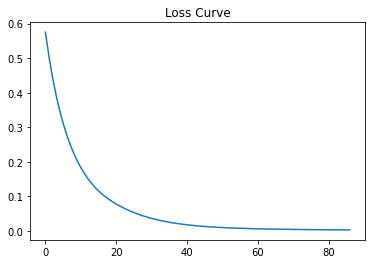

In [62]:
# Curva de Custo
pd.Series(modelo.loss_curve_).plot(title = "Loss Curve")